In [22]:
import data
import utilities
import matplotlib.dates as mdates
from datetime import datetime, time
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.patches import Patch



In [23]:
fortaleza_high_tide_csv = data.get_fortaleza_high_tide_csv()
fortaleza_low_tide_csv = data.get_fortaleza_low_tide_csv()
moon_phase_csv = data.get_moon_phase_csv()
nate_and_soph_csv = data.nate_and_soph_csv
surf_camp_csv = data.surf_camp_csv
oct_wild_north_csv = data.oct_wild_north_csv

In [24]:
df_moon = pd.read_csv(StringIO(moon_phase_csv), parse_dates=['Date'])
df_fortaleza_high_tide = pd.read_csv(StringIO(fortaleza_high_tide_csv), parse_dates=['High Tide Time'])
df_fortaleza_low_tide = pd.read_csv(StringIO(fortaleza_low_tide_csv), parse_dates=['Low Tide Time'])
df_nate_and_soph = pd.read_csv(StringIO(nate_and_soph_csv), parse_dates=['Date'])
df_julia = pd.read_csv(StringIO(data.julia_csv), parse_dates=['Date'])
df_jill_and_steve = pd.read_csv(StringIO(data.jill_and_steve_csv), parse_dates=['Date'])
df_sarah_and_taylor = pd.read_csv(StringIO(data.sarah_and_taylor_csv), parse_dates=['Date'])
df_surf_camp = pd.read_csv(StringIO(surf_camp_csv), parse_dates=['Date'])
df_oct_wild_north = pd.read_csv(StringIO(oct_wild_north_csv), parse_dates=['Date'])
df_nov_wild_north = pd.read_csv(StringIO(data.nov_wild_north_csv), parse_dates=['Date'])
df_oct_classic = pd.read_csv(StringIO(data.oct_classic_csv), parse_dates=['Date'])
df_nov_classic = pd.read_csv(StringIO(data.nov_classic_express_csv), parse_dates=['Date'])
df_nov_nomad = pd.read_csv(StringIO(data.nov_nomade_csv), parse_dates=['Date'])

In [25]:
# copy df_fortaleza_high_tide to df_ilha_do_guajiru_high_tide
df_ilha_do_guajiru_high_tide = df_fortaleza_high_tide.copy()

# shift df_ilha_do_guajiru_high_tide['High Tide Time'] by 20 minutes
df_ilha_do_guajiru_high_tide['High Tide Time'] = df_ilha_do_guajiru_high_tide['High Tide Time'] + pd.Timedelta(minutes=20)

# create a new df with columns 'Date' and 'Name' where each row is a date (no time) and value is 'Ilha is Good' if that date has a high tide that falls between 13:00 and 18:00 in df_ilha_do_guajiru_high_tide
# Define start and end times
start_time = time(14, 0)
end_time = time(18, 0)
df_ilha_is_good = utilities.filter_high_tides_within_time_range(df_ilha_do_guajiru_high_tide, start_time, end_time, 'Ilha')

df_macapa_is_good = df_ilha_is_good.copy()

In [26]:
# create a new df with columns 'Date' and 'Name' for all in df_nate_and_soph that are the first day of the week
df_jeri_is_good = df_nate_and_soph[df_nate_and_soph['Date'].dt.dayofweek.isin([4, 5])]
# reset index
df_jeri_is_good.reset_index(drop=True, inplace=True)
df_jeri_is_good['Name'] = 'Jeri Party Time'

/tmp/ipykernel_1357/1757259678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeri_is_good['Name'] = 'Jeri Party Time'


In [27]:
# create a dict with location as key and number as value, where number increases moving west from Fortaleza

name_to_number = data.name_to_number

/tmp/ipykernel_1357/435641304.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeri_is_good['DateNum'] = mdates.date2num(df_jeri_is_good['Date'])


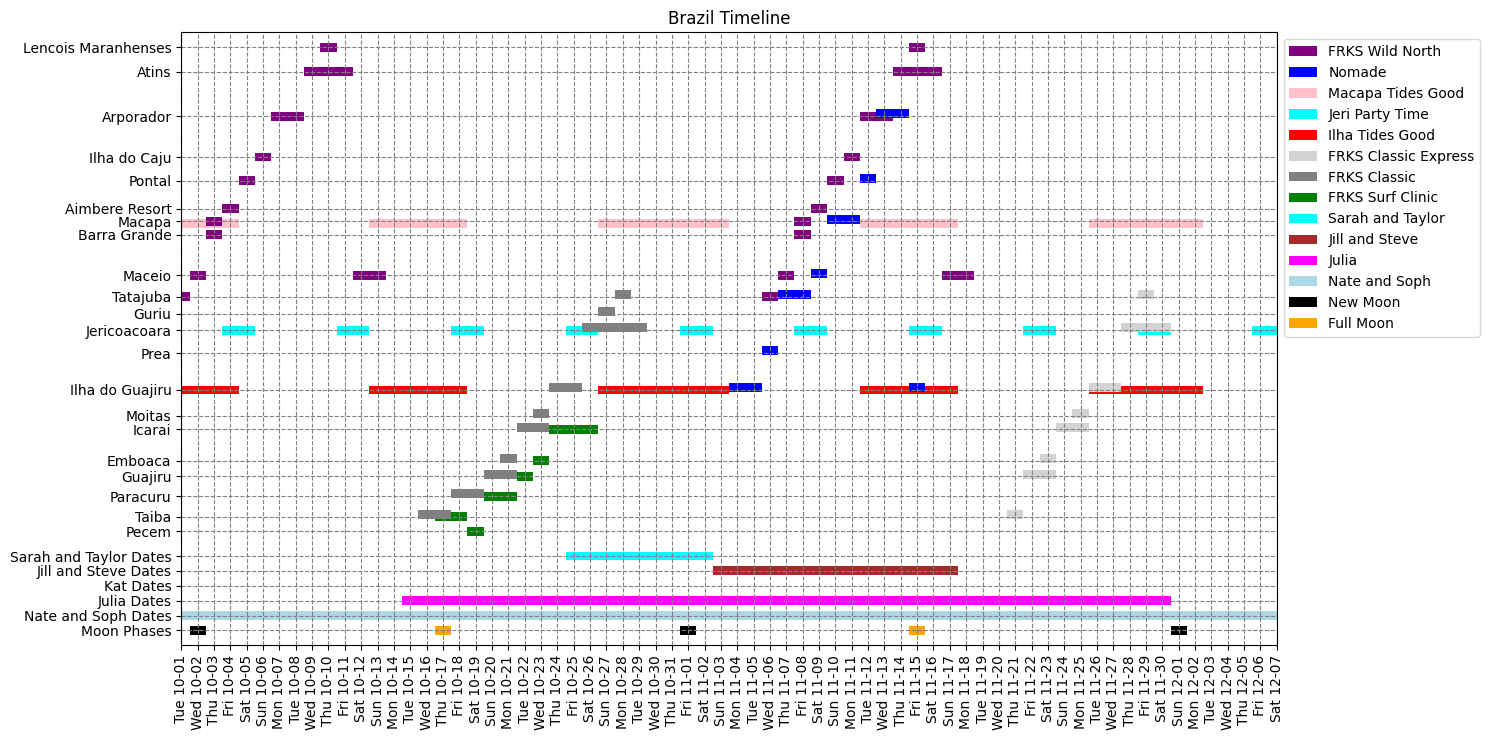

In [28]:
# Convert 'Date' to matplotlib date format
df_moon['DateNum'] = mdates.date2num(df_moon['Date'])
df_nate_and_soph['DateNum'] = mdates.date2num(df_nate_and_soph['Date'])
df_julia['DateNum'] = mdates.date2num(df_julia['Date'])
df_surf_camp['DateNum'] = mdates.date2num(df_surf_camp['Date'])
df_oct_wild_north['DateNum'] = mdates.date2num(df_oct_wild_north['Date'])
df_nov_wild_north['DateNum'] = mdates.date2num(df_nov_wild_north['Date'])
df_oct_classic['DateNum'] = mdates.date2num(df_oct_classic['Date'])
df_nov_classic['DateNum'] = mdates.date2num(df_nov_classic['Date'])
df_ilha_is_good['DateNum'] = mdates.date2num(df_ilha_is_good['Date'])
df_jeri_is_good['DateNum'] = mdates.date2num(df_jeri_is_good['Date'])
df_macapa_is_good['DateNum'] = mdates.date2num(df_macapa_is_good['Date'])
df_nov_nomad['DateNum'] = mdates.date2num(df_nov_nomad['Date'])

# Assuming a fixed duration for visualization, adjusted to start half a day earlier
duration = 1  # Duration of one day
half_day = 0.5  # Half day in Matplotlib's date format

# Prepare data for plotting with adjusted times
phases = {'New Moon': [], 'Full Moon': []}
for _, row in df_moon.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    phases[row['Phase']].append((start_date, duration))

# Prepare data for plotting Nate and Soph dates
nate_and_soph_dates = []
for _, row in df_nate_and_soph.iterrows():
    if row['Name'] == "Nate and Soph":
        start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
        nate_and_soph_dates.append((start_date, duration))

# Prepare data for plotting Julia dates
julia_dates = []
for _, row in df_julia.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    julia_dates.append((start_date, duration))

# Prepare data for plotting Jill and Steve dates
jill_and_steve_dates = []
for _, row in df_jill_and_steve.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    jill_and_steve_dates.append((start_date, duration))

# Prepare data for plotting Sarah and Taylor dates
sarah_and_taylor_dates = []
for _, row in df_sarah_and_taylor.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    sarah_and_taylor_dates.append((start_date, duration))

# Prepare data for plotting Surf Camp dates
surf_camp_dates = []
for _, row in df_surf_camp.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    surf_camp_dates.append((start_date, duration))

# Prepare data for plotting downwinder dates
oct_wild_north_dates = []
for _, row in df_oct_wild_north.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    oct_wild_north_dates.append((start_date, duration))

oct_classic_dates = []
for _, row in df_oct_classic.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    oct_classic_dates.append((start_date, duration))

# Prepare data for plotting downwinder dates
nov_classic_dates = []
for _, row in df_nov_classic.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    nov_classic_dates.append((start_date, duration))

# Prepare data for plotting downwinder dates
nov_wild_north_dates = []
for _, row in df_oct_wild_north.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    nov_wild_north_dates.append((start_date, duration))

# Prepare data for plotting downwinder dates
nov_nomad_dates = []
for _, row in df_nov_nomad.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    nov_nomad_dates.append((start_date, duration))

# Prepare data for plotting Ilha is Good dates
ilha_is_good_dates = []
for _, row in df_ilha_is_good.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    ilha_is_good_dates.append((start_date, duration))

# Prepare data for plotting Macapa is Good dates
macapa_is_good_dates = []
for _, row in df_macapa_is_good.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    macapa_is_good_dates.append((start_date, duration))

# Prepare data for plotting Jeri is good dates
jeri_is_good_dates = []
for _, row in df_jeri_is_good.iterrows():
    start_date = mdates.date2num(row['Date']) - half_day  # Adjust start date to half a day earlier
    jeri_is_good_dates.append((start_date, duration))


# Plotting
fig, ax = plt.subplots(figsize=(15, 15*data.factor))
colors = {'New Moon': 'black', 
          'Full Moon': 'orange', 
          'Nate and Soph': 'lightblue', 
          'Julia': 'magenta', 
          'Jill and Steve': 'brown',
          'Sarah and Taylor': 'aqua',
          'Surf Camp': 'green', 
          'Ilha is Good': 'red', 
          'Oct Wild North': 'purple', 
          'Oct Classic': 'grey', 
          'Nov Classic Express': 'lightgrey',
          'Jeri is Good': 'cyan', 
          'Nomade': 'blue', 
          'Macapa is Good': 'pink'}

width = 3#*data.factor
offset = 1.5#*data.factor

# Plot Ilha is Good dates
ax.broken_barh(ilha_is_good_dates, (name_to_number['Ilha do Guajiru'] - offset, width), facecolors=colors['Ilha is Good'], label='Ilha is Good')

# Plot Macapa is Good dates
ax.broken_barh(macapa_is_good_dates, (name_to_number['Macapa'] - offset - offset/2, width), facecolors=colors['Macapa is Good'], label='Macapa is Good')

# Plot Jeri is Good dates
ax.broken_barh(jeri_is_good_dates, (name_to_number['Jericoacoara'] - offset, width), facecolors=colors['Jeri is Good'], label='Jeri Party Time')

# Plot moon phases
for phase, times in phases.items():
    ax.broken_barh(times, (name_to_number['Moon Phases'] - offset, width), facecolors=colors[phase], label=phase)

# Plot Nate and Soph dates
ax.broken_barh(nate_and_soph_dates, (name_to_number['Nate and Soph Dates'] - offset, width), facecolors=colors['Nate and Soph'], label='Nate and Soph')

# Plot Julia dates
ax.broken_barh(julia_dates, (name_to_number['Julia Dates'] - offset, width), facecolors=colors['Julia'], label='Julia')

# Plot Jill and Steve dates
ax.broken_barh(jill_and_steve_dates, (name_to_number['Jill and Steve Dates'] - offset, width), facecolors=colors['Jill and Steve'], label='Jill and Steve')

# Plot Sarah and Taylor dates
ax.broken_barh(sarah_and_taylor_dates, (name_to_number['Sarah and Taylor Dates'] - offset, width), facecolors=colors['Sarah and Taylor'], label='Sarah and Taylor')

# Map 'Location' to a numerical value
df_surf_camp['LocationNum'] = df_surf_camp['Location'].map(name_to_number)

# Plot Surf Camp dates
for location, group in df_surf_camp.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset, width), facecolors=colors['Surf Camp'])

# Map 'Location' to a numerical value
df_oct_wild_north['LocationNum'] = df_oct_wild_north['Location'].map(name_to_number)

# Plot Oct Wild North dates
for location, group in df_oct_wild_north.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset, width), facecolors=colors['Oct Wild North'])

# Map 'Location' to a numerical value
df_oct_classic['LocationNum'] = df_oct_classic['Location'].map(name_to_number)

# Plot Oct Classic dates
for location, group in df_oct_classic.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset/2, width), facecolors=colors['Oct Classic'])

# Map 'Location' to a numerical value
df_nov_classic['LocationNum'] = df_nov_classic['Location'].map(name_to_number)

# Plot Nov Classic dates
for location, group in df_nov_classic.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset/2, width), facecolors=colors['Nov Classic Express'])

# Map 'Location' to a numerical value
df_nov_wild_north['LocationNum'] = df_nov_wild_north['Location'].map(name_to_number)

# Plot Nov Wild North dates
for location, group in df_nov_wild_north.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset, width), facecolors=colors['Oct Wild North'])

# Map 'Location' to a numerical value
df_nov_nomad['LocationNum'] = df_nov_nomad['Location'].map(name_to_number)

# Plot Nov Nomad dates
for location, group in df_nov_nomad.groupby('Location'):
    bars = [(date_num - half_day, 1) for date_num in group['DateNum']]  # Assuming each event lasts 1 day
    ax.broken_barh(bars, (name_to_number[location] - offset/2, width), facecolors=colors['Nomade'])
    
# Formatting the plot
ax.set_yticks([])

# add a legend label named 'Surf Camp' to the plot with color['Surf Camp']

# Create a list of proxy artists for the legend
legend_handles = [Patch(facecolor=colors['Oct Wild North'], label='FRKS Wild North'),
                  Patch(facecolor=colors['Nomade'], label='Nomade'),
                  Patch(facecolor=colors['Macapa is Good'], label='Macapa Tides Good'),
                  Patch(facecolor=colors['Jeri is Good'], label='Jeri Party Time'),
                  Patch(facecolor=colors['Ilha is Good'], label='Ilha Tides Good'),
                  Patch(facecolor=colors['Nov Classic Express'], label='FRKS Classic Express'),
                  Patch(facecolor=colors['Oct Classic'], label='FRKS Classic'),
                  Patch(facecolor=colors['Surf Camp'], label='FRKS Surf Clinic'),
                  Patch(facecolor=colors['Sarah and Taylor'], label='Sarah and Taylor'),
                  Patch(facecolor=colors['Jill and Steve'], label='Jill and Steve'),
                  Patch(facecolor=colors['Julia'], label='Julia'),
                  Patch(facecolor=colors['Nate and Soph'], label='Nate and Soph'),
                  Patch(facecolor=colors['New Moon'], label='New Moon'),
                  Patch(facecolor=colors['Full Moon'], label='Full Moon'),
                  ]

# Add the legend to the plot
ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set X-axis range
# Convert start and end dates to Matplotlib's date format
start_date = mdates.date2num(datetime(2024, 10, 1))
end_date = mdates.date2num(datetime(2024, 12, 7))

# Set the x-axis range to the specified dates
ax.set_xlim(start_date, end_date)
# Set Y-axis range
# Since your bars are at y=10 with a height of 1, setting the range from 0 to 15 gives some padding
ax.set_ylim(min(name_to_number.values())-5, max(name_to_number.values())+5)


# Set major ticks locator to each day
ax.xaxis.set_major_locator(mdates.DayLocator())
# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %m-%d'))
# Set Y-axis tick positions
ax.set_yticks(list(name_to_number.values()))
# Set Y-axis tick labels
ax.set_yticklabels(list(name_to_number.keys()))

# Enable vertical grid lines for each day
ax.grid(True, which='major', axis='x', linestyle='--', color='gray')
ax.grid(True, which='major', axis='y', linestyle='--', color='gray')

# The rest of your plotting code remains unchanged
plt.xticks(rotation=90)
plt.title('Brazil Timeline')
plt.tight_layout()
plt.show()